<a href="https://colab.research.google.com/github/ILPATHERA/ML2_Pokemoncreator/blob/main/ML2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Machine Learning 2 Image Classification Model

## Introduction

Welcome to this Jupyter Notebook, which focuses on the classification of Pokémon images using a machine learning model. In this project, we will utilize a Pokémon dataset to train an image classification model. The trained model will then be used to classify new Pokémon images.


## Dataset: Pokémon Images


I obtained my data from Kaggle. The Pokemon dataset consists of a CSV file that includes the name of each Pokemon and its two types. Additionally, the folder contains the images of the Pokemon.
The goal is to create a model capable of identifying these Pokémon based on their visual characteristics. We will divide the dataset into training and testing sets.

### Import Libraries

I could have included all imports which were used in one cell. However, since I like to be able to see in the respective cell which import is needed, I will import this in the respective cell.

### Load Data

I found the dataset on Kaggle. To use this directly, we need the API of Kaggle. In my GitHub repository there is a file called kaggle.json. Download it and upload it below.

Upload kaggle.json

In [39]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"simoneantoniosommer","key":"ccbbebbff4f40fa13f5b9024966cb78c"}'}

Setup Kaggle API

In [40]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 75 Jun 10 06:31 kaggle.json
/content


Giving permission to file

In [41]:
!chmod 600 ~/.kaggle/kaggle.json

Now we check the connection to Kaggle. If the following is a list of datasets, then the connection to the Kaggle API has succeeded.

In [42]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          28819        807  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2517         71  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4922        100  1.0              
mohithsairamreddy/salary-data 

Now the dataset "pokemon-images-and-types" is downloaded, unzipped and saved to the current working directory of the Jupyter notebook. This dataset contains images of Pokémon along with their type information.

This is the dataset we will use in this Jupyter Notebook.

In [43]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types --force
!unzip /content/pokemon-images-and-types.zip


100% 2.47M/2.47M [00:00<00:00, 4.72MB/s]
100% 2.47M/2.47M [00:00<00:00, 4.04MB/s]
Archive:  /content/pokemon-images-and-types.zip
replace images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  

The dataset consists of a CSV file and a folder with the images in JPG and PNG format. So that we can connect this accordingly, we add a column to the DF and deposit the respective path of the image.

In [49]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os

#Create df
df = pd.read_csv('/content/pokemon.csv')

# Path to the images
image_folder = '/content/images/images'

#map image names
image_dict = {}
for file in os.listdir(image_folder):
    image_dict[os.path.splitext(file)[0]] = os.path.join(image_folder, file)

#new Column for path
df['image_path'] = df['Name'].map(image_dict)

# Display the DataFrame
print(df.head())
print("...")
print(df.tail())


         Name  Type1   Type2                             image_path
0   bulbasaur  Grass  Poison   /content/images/images/bulbasaur.png
1     ivysaur  Grass  Poison     /content/images/images/ivysaur.png
2    venusaur  Grass  Poison    /content/images/images/venusaur.png
3  charmander   Fire     NaN  /content/images/images/charmander.png
4  charmeleon   Fire     NaN  /content/images/images/charmeleon.png
...
            Name     Type1  Type2                              image_path
804    stakataka      Rock  Steel    /content/images/images/stakataka.jpg
805  blacephalon      Fire  Ghost  /content/images/images/blacephalon.jpg
806      zeraora  Electric    NaN      /content/images/images/zeraora.jpg
807       meltan     Steel    NaN       /content/images/images/meltan.jpg
808     melmetal     Steel    NaN     /content/images/images/melmetal.jpg


To get a glimpse of the data, I will display the first 6 images.

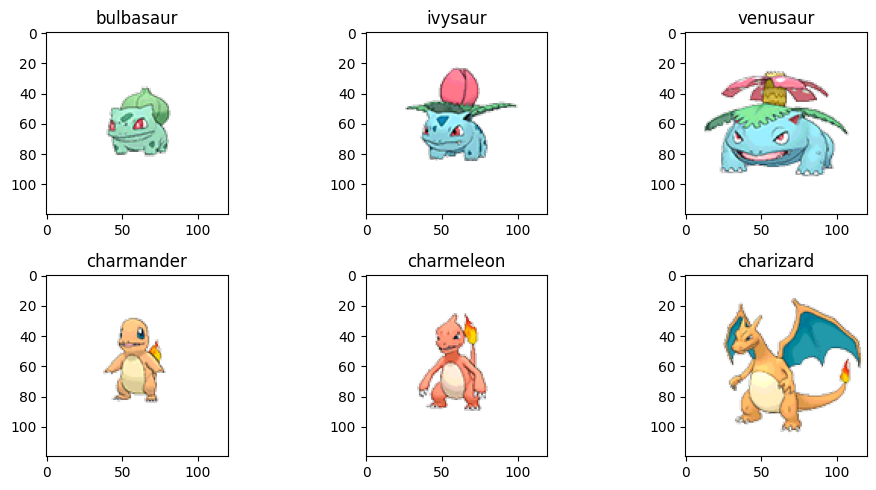

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#path of the images
image_folder = '/content/images/images'

#Create Subset
df_subset = df.head(6)
num_rows = (len(df_subset) - 1) // 3 + 1
num_cols = min(len(df_subset), 3)

#Create Subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

#Show Images as plot
for i, ax in enumerate(axes.flat):
    if i < len(df_subset):
        image_name = df_subset.loc[i, 'Name']
        image_path = f'{image_folder}/{image_name}.png'
        #load image
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(image_name)
      
plt.tight_layout()
plt.show()


Now, I would like to perform a detailed examination of my dataset. First and foremost, I want to determine the total number of entries and the number of columns present in the dataset. This information will provide an overview of the dataset's size and structure, allowing me to gain insights into its dimensions. Additionally, I am interested in identifying the names of all the columns in the dataset, which will help me understand the specific variables and attributes captured by the dataset.

In [52]:
# Determine the number of entries and columns in the dataset
num_entries = len(df)
num_columns = len(df.columns)
columns = df.columns

print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)


Number of entries: 809
Number of columns: 4
Colums: Index(['Name', 'Type1', 'Type2', 'image_path'], dtype='object')


With the following function I now check if there are empty fields in my dataset. 


In [53]:
missing_values = df.isnull().sum()
print(missing_values)


Name            0
Type1           0
Type2         404
image_path      0
dtype: int64


Based on this value, I see that 404 fields are missing in the column "Type 2". After analyzing the mentioned fields, I see that this is not relevant, because there are Pokemons that do not necessarily have 2 types.

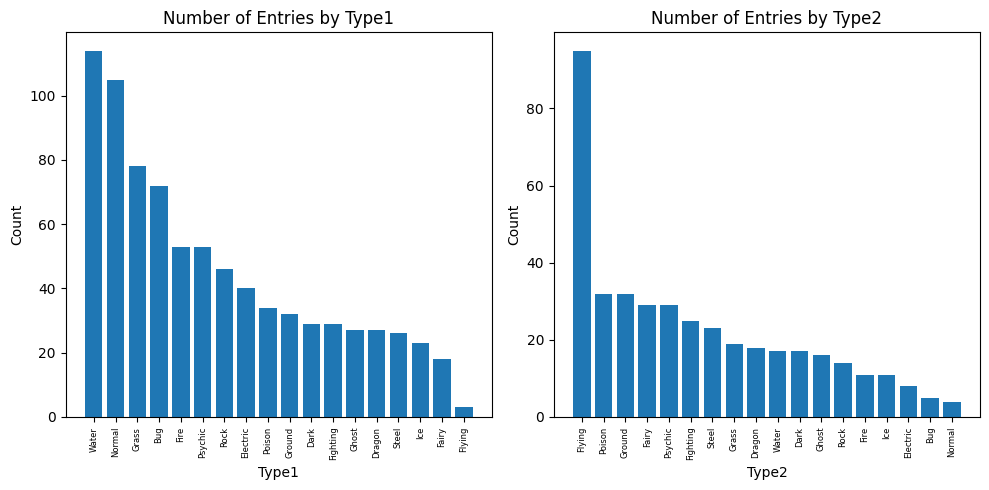

In [54]:
#Create plot for pokemon types
columns = ['Type1', 'Type2']
num_subplots = len(columns)
fig, axes = plt.subplots(1, num_subplots, figsize=(10, 5))
for i, column in enumerate(columns):
    #Count
    counts = df[column].value_counts()
    ax = axes[i]
    ax.bar(counts.index, counts.values)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Number of Entries by {column}')
    ax.tick_params(axis='x', rotation=90, labelsize=6)

plt.tight_layout()
plt.show()

### Transforming the Data

In this code, I step through each row of the DataFrame to categorize the Pokemon based on their types.

For each row, I check the values of the Type1 and Type2 columns to determine the type of the pokemon. If the type matches a particular category, the corresponding type name is appended to the poke_type list and the corresponding code is appended to the code list.

Since the data is not so balanced, I decided to use only the first 5 most represented classes.

**Note:**
I put several hours into training with different models. Due to the many classes, the training lasted forever in each case and the result was not good. Therefore I have decided to limit the classes

In [91]:
poke_type = []
code = []

for i in range(df.shape[0]):
    if (df.iloc[i]['Type1'] == 'Water') or (df.iloc[i]['Type2'] == 'Water'):
        poke_type.append('Water')
        code.append(1)
    elif (df.iloc[i]['Type1'] == 'Normal') or (df.iloc[i]['Type2'] == 'Normal'):
        poke_type.append('Normal')
        code.append(2)
    elif (df.iloc[i]['Type1'] == 'Grass') or (df.iloc[i]['Type2'] == 'Grass'):
        poke_type.append('Grass')
        code.append(3)
    elif (df.iloc[i]['Type1'] == 'Fire') or (df.iloc[i]['Type2'] == 'Fire'):
        poke_type.append('Fire')
        code.append(4)
    elif (df.iloc[i]['Type1'] == 'Bug') or (df.iloc[i]['Type2'] == 'Bug'):
        poke_type.append('Bug')
        code.append(5)
    else:
        poke_type.append('NaN')
        code.append('NaN')


## Create PokeDex for Training :D
Since I am working with a Pokemon dataset I would like to decide which Pokemon I will use for my training. For this I make a new dataset and call it Pokedex

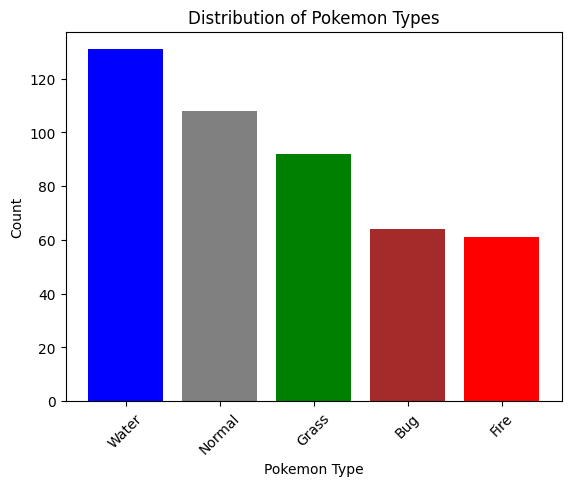

In [102]:
import matplotlib.pyplot as plt

# Create new df
pokedex = df

# Create new columns and drop old ones
pokedex['type'] = poke_type
pokedex['code'] = code
pokedex = pokedex.drop(['Type1', 'Type2', 'Name'], axis=1)

# Check for missing values and drop them
missing_values = pokedex.isnull().sum()
pokedex = pokedex[pokedex['type'] != 'NaN']

#Create categories
category_counts = pokedex['type'].value_counts()
category_colors = {'Water': 'blue', 'Normal': 'gray', 'Grass': 'green', 'Fire': 'red', 'Bug': 'brown'}

# Plot
categories = category_counts.index
counts = category_counts.values
plt.bar(categories, counts, color=[category_colors.get(category, 'gray') for category in categories])
plt.xlabel('Pokemon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokemon Types')
plt.xticks(rotation=45)
plt.show()


In [106]:
pokedex.head()

,image_path,type,code
0,/content/images/images/bulbasaur.png,Grass,3
1,/content/images/images/ivysaur.png,Grass,3
2,/content/images/images/venusaur.png,Grass,3
3,/content/images/images/charmander.png,Fire,4
4,/content/images/images/charmeleon.png,Fire,4


### Creating Training/Validation/Testset

In this section, I am creating the sets for training and testing the model from my dataset.

I have decided to split the data into the following proportions:

*   Training set: 80% of the data
*   Validation set: 10% of the data
*   Test set: 10% of the data


In [103]:
# Determine the number of entries and columns in the dataset
num_entries = len(pokedex)
num_columns = len(pokedex.columns)
columns = pokedex.columns

print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)

Number of entries: 456
Number of columns: 3
Colums: Index(['image_path', 'type', 'code'], dtype='object')


This code creates an image generation generator. This method is used to edit and enhance my training images. This is done by zooming, flipping or adding new pixels to the images.

In [126]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2)

In these two methods, from the data which were newly generated and generated batches for the training data and the validation data

In [129]:
train_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')

validation_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

test_generator = train_datagenerator.flow_from_dataframe(
    pokedex, 
    x_col='image_path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)


Found 365 validated image filenames belonging to 5 classes.
Found 91 validated image filenames belonging to 5 classes.
Found 91 validated image filenames belonging to 5 classes.


In [133]:
train_percentage = len(train_generator.filenames) / len(pokedex) * 100
validation_percentage = len(validation_generator.filenames) / len(pokedex) * 100

print("Training: {:.2f}%".format(train_percentage))
print("Validation: {:.2f}%".format(validation_percentage))


Training: 80.04%
Validation: 19.96%


## Visualizing the Results

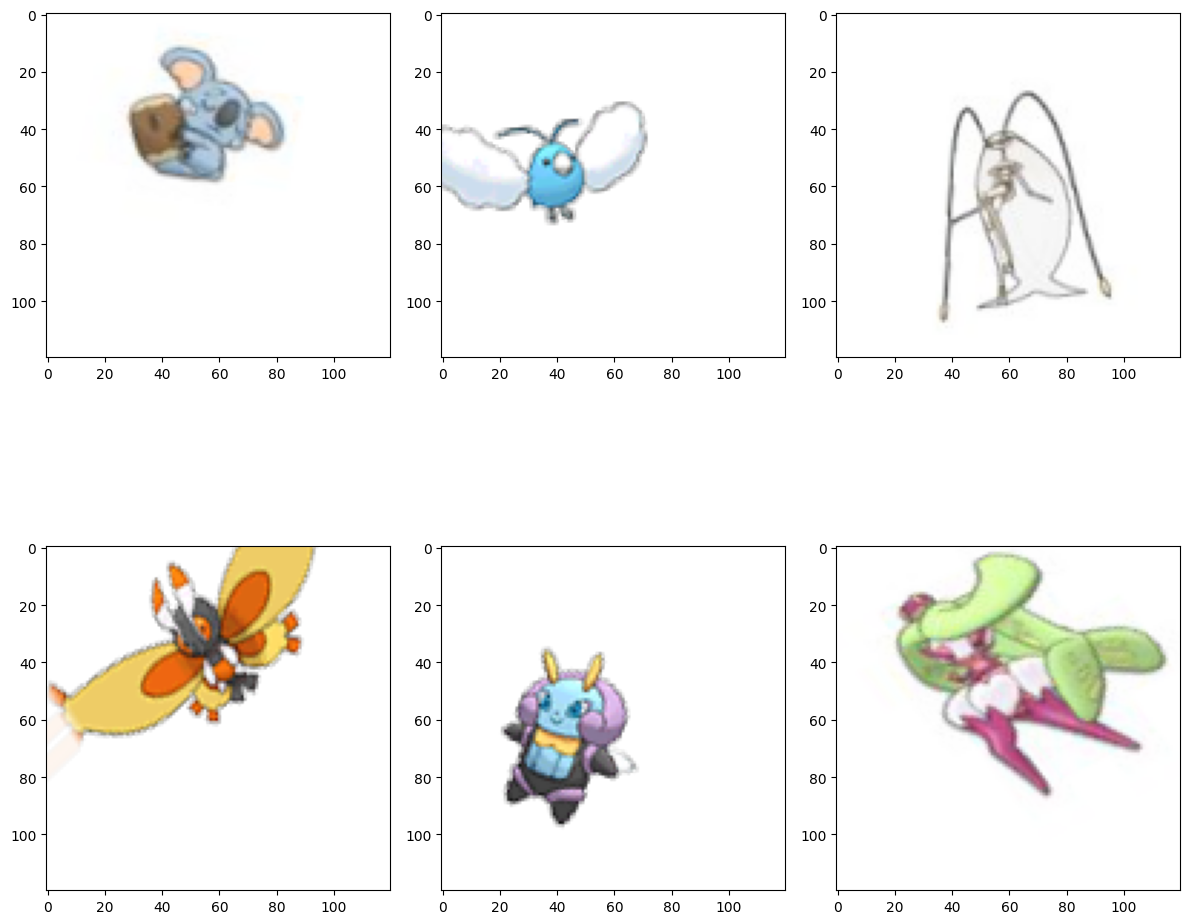

In [134]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Model

Lets create a Model

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_dataframe(
    pokedf, 
    x_col='image_path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    pokedf , 
    x_col='image_path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 729 validated image filenames belonging to 18 classes.
Found 80 validated image filenames belonging to 18 classes.


In [160]:
import keras as ks
from keras.layers import Dropout
from keras.optimizers import SGD

model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

model.add(ks.layers.Flatten())

model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(5, activation='softmax'))

# Optimierung
optimizer = SGD(learning_rate=0.001, momentum=0.9)


In [161]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 120, 120, 4)       20        
                                                                 
 conv2d_23 (Conv2D)          (None, 118, 118, 64)      2368      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 59, 59, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 57, 57, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                 

In [162]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [163]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.7) and (logs.get('val_acc')>0.7):
            print('\n reached 70% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()

In [164]:
model.layers

In [165]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    batch_size=20, 
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
)

Epoch 1/100
12/12 [==============================] - 5s 212ms/step - loss: 1.7446 - acc: 0.2411 - val_loss: 1.5592 - val_acc: 0.3516 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 2s 188ms/step - loss: 1.5975 - acc: 0.2712 - val_loss: 1.5562 - val_acc: 0.3516 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 2s 198ms/step - loss: 1.5884 - acc: 0.2548 - val_loss: 1.5651 - val_acc: 0.3516 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 2s 185ms/step - loss: 1.5687 - acc: 0.2685 - val_loss: 1.5328 - val_acc: 0.3516 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 2s 194ms/step - loss: 1.5345 - acc: 0.2712 - val_loss: 1.4620 - val_acc: 0.3516 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 2s 186ms/step - loss: 1.5075 - acc: 0.2986 - val_loss: 1.4872 - val_acc: 0.2967 - lr: 0.0010
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 1.4520 - acc: 0.3041 - val_loss: 1.4686 - val_acc

In [166]:
model_folder = '/content/models/mysecondmodel.h5'
model.save(model_folder)
#Download Model
from google.colab import files
files.download(model_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

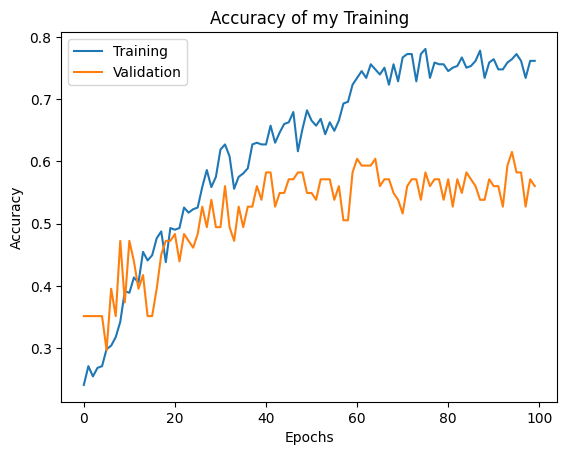

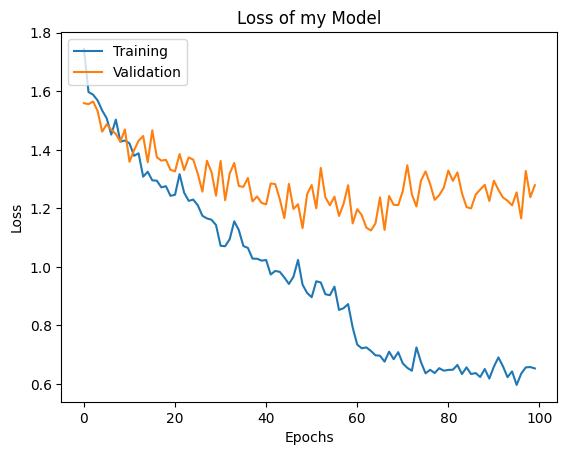

In [184]:

# Plot Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of my Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

#Plot Los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of my Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [181]:
import numpy as np
from PIL import Image

# Pfad zum Testbild
test_image_path = '/content/testimage3.png'  # Passe den Pfad entsprechend an

# Das Bild in das gewünschte Format laden und vorverarbeiten
test_image = Image.open(test_image_path).resize((120, 120))
test_image = np.array(test_image)
test_image = test_image / 255.0  # Normalisierung
test_image = np.expand_dims(test_image, axis=0)

class_names = ['Water', 'Normal', 'Grass', 'Fire', 'Bug']

# Vorhersage mit dem trainierten Modell
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

print('Vorhergesagte Klasse:', predicted_class_name)


1/1 [==============================] - 0s 58ms/step
Vorhergesagte Klasse: Fire


In [159]:
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
)

Epoch 1/100


<ipython-input-159-a0eb59448f1a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


12/12 [==============================] - 2s 188ms/step - loss: 1.2662 - acc: 0.4877 - val_loss: 1.4125 - val_acc: 0.3846 - lr: 1.0000e-09
Epoch 2/100
12/12 [==============================] - 2s 205ms/step - loss: 1.2809 - acc: 0.4877 - val_loss: 1.4015 - val_acc: 0.4176 - lr: 1.0000e-09
Epoch 3/100
12/12 [==============================] - 2s 182ms/step - loss: 1.3006 - acc: 0.4712 - val_loss: 1.4275 - val_acc: 0.3846 - lr: 1.0000e-09
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 1.2969 - acc: 0.4411 - val_loss: 1.4519 - val_acc: 0.3846 - lr: 1.0000e-09
Epoch 5/100
12/12 [==============================] - 2s 193ms/step - loss: 1.2838 - acc: 0.4877 - val_loss: 1.3992 - val_acc: 0.3736 - lr: 1.0000e-09
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 1.2860 - acc: 0.4575 - val_loss: 1.4179 - val_acc: 0.4505 - lr: 1.0000e-09
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 1.2849 - acc: 0.4548 - val_loss: 1.37

Now to dont loose time. I will safe my model.

In [28]:
model_folder = '/content/models/myfirstmodel.h5'
model.save(model_folder)


In [29]:
#Download Model
from google.colab import files
files.download(model_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

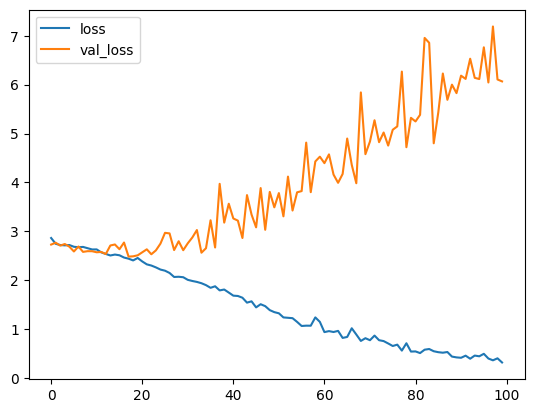

In [32]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()

In [33]:
import tensorflow as tf
import numpy as np
from PIL import Image

test_image_path = '/content/testimage2.png'  # Passe den Pfad zu deinem Testbild an

# Lade das Testbild und passe es an die Eingabeform des Modells an
test_image = Image.open(test_image_path)
test_image = test_image.resize((120, 120))  # Annahme: Das Modell erwartet eine Eingabe der Größe 224x224
test_image = np.array(test_image) / 255.0  # Normalisierung der Pixelwerte auf den Bereich [0, 1]
test_image = np.expand_dims(test_image, axis=0)  # Hinzufügen einer zusätzlichen Dimension für den Batch

# Mache eine Vorhersage mit dem Modell
predictions = model.predict(test_image)

# Interpretiere die Vorhersagen
predicted_class = np.argmax(predictions)
print('Vorhersage:', predicted_class)


1/1 [==============================] - 0s 194ms/step
Vorhersage: 17



1.  Grass
2.  Water
3.  Fire
4.  Rock
5.  Poison
6.  Ground
7.  Steel
8.  Electric
9.  Ice
10. Dark
11. Flying
12. Bug
13. Fighting
14. Psychic
15. Ghost
16. Dragon
17. Fairy

New Model

In [34]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [35]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load and preprocess the images
X_data = []
Y_data = []
images_path = '/content/images/images'
images = os.listdir(images_path)

i = 0
images_count = len(images)
for filename in tqdm(images, total=images_count, desc='Processing images'):
    i += 1
    print(f'{filename}: {i}/{images_count}', end='\r')
    image = cv2.imread(os.path.join(images_path, filename))
    resized_image = cv2.resize(image, (28, 28))
    if resized_image is not None:
        X_data.append(resized_image)
        img_name = filename.split('.')[0]
        Y_data.append(img_name)
        for _ in range(100):
            random_img = datagen.random_transform(image)
            random_img = cv2.resize(random_img, (28, 28))
            X_data.append(random_img)
            Y_data.append(img_name)

X_data = np.array(X_data).astype('float32')
X_data /= 255.0

# Convert labels to numerical form using label encoding
encoder = LabelEncoder()
Y_data_encoded = encoder.fit_transform(Y_data)

# Convert numerical labels to one-hot encoding
Y_data_one_hot = to_categorical(Y_data_encoded)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data_one_hot, test_size=0.2, random_state=42)


Processing images:   0%|          | 0/809 [00:00<?, ?it/s]

Processing images:   0%|          | 1/809 [00:00<04:31,  2.98it/s]

Processing images:   0%|          | 2/809 [00:00<04:09,  3.24it/s]

Processing images:   0%|          | 3/809 [00:00<04:02,  3.33it/s]

Processing images:   0%|          | 4/809 [00:01<03:59,  3.36it/s]

Processing images:   1%|          | 5/809 [00:01<03:54,  3.43it/s]

Processing images:   1%|          | 6/809 [00:01<03:53,  3.43it/s]

Processing images:   1%|          | 7/809 [00:02<04:00,  3.33it/s]

Processing images:   1%|          | 8/809 [00:02<04:03,  3.29it/s]

Processing images:   1%|          | 9/809 [00:02<04:04,  3.27it/s]

Processing images:   1%|          | 10/809 [00:03<04:04,  3.26it/s]

Processing images:   1%|▏         | 11/809 [00:03<04:09,  3.20it/s]

Processing images:   1%|▏         | 12/809 [00:03<04:12,  3.15it/s]

Processing images:   2%|▏         | 13/809 [00:03<04:11,  3.16it/s]

Processing images:   2%|▏         | 14/809 [00:04<04:06,  3.22it/s]

Processing images:   2%|▏         | 15/809 [00:04<04:04,  3.25it/s]

Processing images:   2%|▏         | 16/809 [00:04<03:59,  3.31it/s]

Processing images:   2%|▏         | 17/809 [00:05<03:59,  3.31it/s]

Processing images:   2%|▏         | 18/809 [00:05<03:55,  3.36it/s]

Processing images:   2%|▏         | 19/809 [00:05<03:53,  3.39it/s]

Processing images:   2%|▏         | 20/809 [00:06<03:55,  3.34it/s]

Processing images:   3%|▎         | 21/809 [00:06<03:54,  3.36it/s]

Processing images:   3%|▎         | 22/809 [00:06<03:53,  3.37it/s]

Processing images:   3%|▎         | 23/809 [00:06<03:51,  3.40it/s]

Processing images:   3%|▎         | 24/809 [00:07<03:50,  3.41it/s]

Processing images:   3%|▎         | 25/809 [00:07<03:48,  3.43it/s]

Processing images:   3%|▎         | 26/809 [00:07<03:46,  3.45it/s]

Processing images:   3%|▎         | 27/809 [00:08<03:45,  3.47it/s]

Processing images:   3%|▎         | 28/809 [00:08<03:42,  3.51it/s]

Processing images:   4%|▎         | 29/809 [00:08<03:42,  3.50it/s]

Processing images:   4%|▎         | 30/809 [00:08<03:43,  3.49it/s]

Processing images:   4%|▍         | 31/809 [00:09<03:45,  3.45it/s]

Processing images:   4%|▍         | 32/809 [00:09<03:45,  3.45it/s]

Processing images:   4%|▍         | 33/809 [00:09<03:45,  3.45it/s]

Processing images:   4%|▍         | 34/809 [00:10<03:47,  3.41it/s]

Processing images:   4%|▍         | 35/809 [00:10<03:45,  3.43it/s]

Processing images:   4%|▍         | 36/809 [00:10<03:45,  3.44it/s]

Processing images:   5%|▍         | 37/809 [00:10<03:44,  3.43it/s]

Processing images:   5%|▍         | 38/809 [00:11<03:46,  3.40it/s]

Processing images:   5%|▍         | 39/809 [00:11<03:49,  3.36it/s]

Processing images:   5%|▍         | 40/809 [00:11<03:50,  3.34it/s]

Processing images:   5%|▌         | 41/809 [00:12<03:49,  3.34it/s]

Processing images:   5%|▌         | 42/809 [00:12<03:49,  3.35it/s]

Processing images:   5%|▌         | 43/809 [00:12<03:48,  3.35it/s]

Processing images:   5%|▌         | 44/809 [00:13<03:48,  3.35it/s]

Processing images:   6%|▌         | 45/809 [00:13<03:49,  3.33it/s]

Processing images:   6%|▌         | 46/809 [00:13<03:53,  3.27it/s]

Processing images:   6%|▌         | 47/809 [00:14<03:54,  3.25it/s]

Processing images:   6%|▌         | 48/809 [00:14<03:54,  3.24it/s]

Processing images:   6%|▌         | 49/809 [00:14<03:51,  3.29it/s]

Processing images:   6%|▌         | 50/809 [00:14<03:55,  3.23it/s]

Processing images:   6%|▋         | 51/809 [00:15<03:54,  3.23it/s]

Processing images:   6%|▋         | 52/809 [00:15<03:51,  3.26it/s]

Processing images:   7%|▋         | 53/809 [00:15<03:48,  3.30it/s]

Processing images:   7%|▋         | 54/809 [00:16<03:48,  3.30it/s]

Processing images:   7%|▋         | 55/809 [00:16<03:45,  3.34it/s]

Processing images:   7%|▋         | 56/809 [00:16<03:46,  3.32it/s]

Processing images:   7%|▋         | 57/809 [00:17<03:44,  3.35it/s]

Processing images:   7%|▋         | 58/809 [00:17<03:43,  3.35it/s]

Processing images:   7%|▋         | 59/809 [00:17<03:43,  3.36it/s]

Processing images:   7%|▋         | 60/809 [00:17<03:41,  3.38it/s]

Processing images:   8%|▊         | 61/809 [00:18<03:40,  3.39it/s]

Processing images:   8%|▊         | 62/809 [00:18<03:40,  3.39it/s]

Processing images:   8%|▊         | 63/809 [00:18<03:39,  3.40it/s]

Processing images:   8%|▊         | 64/809 [00:19<03:39,  3.39it/s]

Processing images:   8%|▊         | 65/809 [00:19<03:39,  3.39it/s]

Processing images:   8%|▊         | 66/809 [00:19<03:39,  3.38it/s]

Processing images:   8%|▊         | 67/809 [00:19<03:37,  3.42it/s]

Processing images:   8%|▊         | 68/809 [00:20<03:35,  3.44it/s]

Processing images:   9%|▊         | 69/809 [00:20<03:34,  3.44it/s]

Processing images:   9%|▊         | 70/809 [00:20<03:33,  3.46it/s]

Processing images:   9%|▉         | 71/809 [00:21<03:33,  3.45it/s]

Processing images:   9%|▉         | 72/809 [00:21<03:33,  3.46it/s]

Processing images:   9%|▉         | 73/809 [00:21<03:31,  3.47it/s]

Processing images:   9%|▉         | 74/809 [00:22<03:29,  3.50it/s]

Processing images:   9%|▉         | 75/809 [00:22<03:29,  3.50it/s]

Processing images:   9%|▉         | 76/809 [00:22<03:30,  3.49it/s]

Processing images:  10%|▉         | 77/809 [00:22<03:31,  3.47it/s]

Processing images:  10%|▉         | 78/809 [00:23<03:30,  3.47it/s]

Processing images:  10%|▉         | 79/809 [00:23<03:30,  3.48it/s]

Processing images:  10%|▉         | 80/809 [00:23<03:28,  3.50it/s]

Processing images:  10%|█         | 81/809 [00:24<03:26,  3.52it/s]

Processing images:  10%|█         | 82/809 [00:24<03:27,  3.50it/s]

Processing images:  10%|█         | 83/809 [00:24<03:27,  3.50it/s]

Processing images:  10%|█         | 84/809 [00:24<03:29,  3.46it/s]

Processing images:  11%|█         | 85/809 [00:25<03:39,  3.30it/s]

Processing images:  11%|█         | 86/809 [00:25<03:41,  3.26it/s]

Processing images:  11%|█         | 87/809 [00:25<03:41,  3.26it/s]

Processing images:  11%|█         | 88/809 [00:26<03:40,  3.28it/s]

Processing images:  11%|█         | 89/809 [00:26<03:46,  3.17it/s]

Processing images:  11%|█         | 90/809 [00:26<03:49,  3.14it/s]

Processing images:  11%|█         | 91/809 [00:27<03:46,  3.18it/s]

Processing images:  11%|█▏        | 92/809 [00:27<03:43,  3.20it/s]

Processing images:  11%|█▏        | 93/809 [00:27<03:41,  3.23it/s]

Processing images:  12%|█▏        | 94/809 [00:28<03:40,  3.24it/s]

Processing images:  12%|█▏        | 95/809 [00:28<03:38,  3.27it/s]

Processing images:  12%|█▏        | 96/809 [00:28<03:35,  3.30it/s]

Processing images:  12%|█▏        | 97/809 [00:28<03:32,  3.35it/s]

Processing images:  12%|█▏        | 98/809 [00:29<03:32,  3.34it/s]

Processing images:  12%|█▏        | 99/809 [00:29<03:30,  3.38it/s]

Processing images:  12%|█▏        | 100/809 [00:29<03:27,  3.41it/s]

Processing images:  12%|█▏        | 101/809 [00:30<03:27,  3.40it/s]

Processing images:  13%|█▎        | 102/809 [00:30<03:25,  3.45it/s]

Processing images:  13%|█▎        | 103/809 [00:30<03:24,  3.46it/s]

Processing images:  13%|█▎        | 104/809 [00:30<03:23,  3.46it/s]

Processing images:  13%|█▎        | 105/809 [00:31<03:22,  3.48it/s]

Processing images:  13%|█▎        | 106/809 [00:31<03:21,  3.49it/s]

Processing images:  13%|█▎        | 107/809 [00:31<03:20,  3.50it/s]

Processing images:  13%|█▎        | 108/809 [00:32<03:20,  3.49it/s]

Processing images:  13%|█▎        | 109/809 [00:32<03:20,  3.49it/s]

Processing images:  14%|█▎        | 110/809 [00:32<03:19,  3.50it/s]

Processing images:  14%|█▎        | 111/809 [00:32<03:18,  3.52it/s]

Processing images:  14%|█▍        | 112/809 [00:33<03:19,  3.50it/s]

Processing images:  14%|█▍        | 113/809 [00:33<03:20,  3.48it/s]

Processing images:  14%|█▍        | 114/809 [00:33<03:19,  3.48it/s]

Processing images:  14%|█▍        | 115/809 [00:34<03:19,  3.48it/s]

Processing images:  14%|█▍        | 116/809 [00:34<03:19,  3.48it/s]

Processing images:  14%|█▍        | 117/809 [00:34<03:19,  3.46it/s]

Processing images:  15%|█▍        | 118/809 [00:34<03:18,  3.49it/s]

Processing images:  15%|█▍        | 119/809 [00:35<03:16,  3.51it/s]

Processing images:  15%|█▍        | 120/809 [00:35<03:15,  3.52it/s]

Processing images:  15%|█▍        | 121/809 [00:35<03:16,  3.50it/s]

Processing images:  15%|█▌        | 122/809 [00:36<03:16,  3.49it/s]

Processing images:  15%|█▌        | 123/809 [00:36<03:16,  3.49it/s]

Processing images:  15%|█▌        | 124/809 [00:36<03:19,  3.43it/s]

Processing images:  15%|█▌        | 125/809 [00:36<03:21,  3.40it/s]

Processing images:  16%|█▌        | 126/809 [00:37<03:20,  3.40it/s]

Processing images:  16%|█▌        | 127/809 [00:37<03:23,  3.35it/s]

Processing images:  16%|█▌        | 128/809 [00:37<03:23,  3.35it/s]

Processing images:  16%|█▌        | 129/809 [00:38<03:24,  3.33it/s]

Processing images:  16%|█▌        | 130/809 [00:38<03:23,  3.33it/s]

Processing images:  16%|█▌        | 131/809 [00:38<03:20,  3.37it/s]

Processing images:  16%|█▋        | 132/809 [00:39<03:21,  3.37it/s]

Processing images:  16%|█▋        | 133/809 [00:39<03:21,  3.36it/s]

Processing images:  17%|█▋        | 134/809 [00:39<03:19,  3.38it/s]

Processing images:  17%|█▋        | 135/809 [00:39<03:20,  3.36it/s]

Processing images:  17%|█▋        | 136/809 [00:40<03:20,  3.36it/s]

Processing images:  17%|█▋        | 137/809 [00:40<03:19,  3.37it/s]

Processing images:  17%|█▋        | 138/809 [00:40<03:19,  3.37it/s]

Processing images:  17%|█▋        | 139/809 [00:41<03:21,  3.33it/s]

Processing images:  17%|█▋        | 140/809 [00:41<03:20,  3.33it/s]

Processing images:  17%|█▋        | 141/809 [00:41<03:21,  3.31it/s]

Processing images:  18%|█▊        | 142/809 [00:42<03:20,  3.32it/s]

Processing images:  18%|█▊        | 143/809 [00:42<03:18,  3.35it/s]

Processing images:  18%|█▊        | 144/809 [00:42<03:18,  3.35it/s]

Processing images:  18%|█▊        | 145/809 [00:42<03:17,  3.36it/s]

Processing images:  18%|█▊        | 146/809 [00:43<03:16,  3.38it/s]

Processing images:  18%|█▊        | 147/809 [00:43<03:15,  3.39it/s]

Processing images:  18%|█▊        | 148/809 [00:43<03:14,  3.40it/s]

Processing images:  18%|█▊        | 149/809 [00:44<03:14,  3.40it/s]

Processing images:  19%|█▊        | 150/809 [00:44<03:11,  3.43it/s]

Processing images:  19%|█▊        | 151/809 [00:44<03:11,  3.43it/s]

Processing images:  19%|█▉        | 152/809 [00:44<03:11,  3.43it/s]

Processing images:  19%|█▉        | 153/809 [00:45<03:12,  3.40it/s]

Processing images:  19%|█▉        | 154/809 [00:45<03:11,  3.41it/s]

Processing images:  19%|█▉        | 155/809 [00:45<03:11,  3.41it/s]

Processing images:  19%|█▉        | 156/809 [00:46<03:13,  3.37it/s]

Processing images:  19%|█▉        | 157/809 [00:46<03:20,  3.25it/s]

Processing images:  20%|█▉        | 158/809 [00:46<03:19,  3.27it/s]

Processing images:  20%|█▉        | 159/809 [00:47<03:19,  3.26it/s]

Processing images:  20%|█▉        | 160/809 [00:47<03:19,  3.26it/s]

Processing images:  20%|█▉        | 161/809 [00:47<03:24,  3.16it/s]

Processing images:  20%|██        | 162/809 [00:48<03:25,  3.15it/s]

Processing images:  20%|██        | 163/809 [00:48<03:26,  3.13it/s]

Processing images:  20%|██        | 164/809 [00:48<03:24,  3.16it/s]

Processing images:  20%|██        | 165/809 [00:49<03:23,  3.17it/s]

Processing images:  21%|██        | 166/809 [00:49<03:23,  3.16it/s]

Processing images:  21%|██        | 167/809 [00:49<03:24,  3.14it/s]

Processing images:  21%|██        | 168/809 [00:49<03:20,  3.20it/s]

Processing images:  21%|██        | 169/809 [00:50<03:17,  3.24it/s]

Processing images:  21%|██        | 170/809 [00:50<03:14,  3.28it/s]

Processing images:  21%|██        | 171/809 [00:50<03:12,  3.32it/s]

Processing images:  21%|██▏       | 172/809 [00:51<03:10,  3.35it/s]

Processing images:  21%|██▏       | 173/809 [00:51<03:09,  3.35it/s]

Processing images:  22%|██▏       | 174/809 [00:51<03:10,  3.34it/s]

Processing images:  22%|██▏       | 175/809 [00:52<03:08,  3.37it/s]

Processing images:  22%|██▏       | 176/809 [00:52<03:07,  3.38it/s]

Processing images:  22%|██▏       | 177/809 [00:52<03:07,  3.38it/s]

Processing images:  22%|██▏       | 178/809 [00:52<03:09,  3.33it/s]

Processing images:  22%|██▏       | 179/809 [00:53<03:09,  3.32it/s]

Processing images:  22%|██▏       | 180/809 [00:53<03:10,  3.31it/s]

Processing images:  22%|██▏       | 181/809 [00:53<03:11,  3.28it/s]

Processing images:  22%|██▏       | 182/809 [00:54<03:08,  3.32it/s]

Processing images:  23%|██▎       | 183/809 [00:54<03:08,  3.33it/s]

Processing images:  23%|██▎       | 184/809 [00:54<03:07,  3.34it/s]

Processing images:  23%|██▎       | 185/809 [00:55<03:06,  3.34it/s]

Processing images:  23%|██▎       | 186/809 [00:55<03:06,  3.34it/s]

Processing images:  23%|██▎       | 187/809 [00:55<03:05,  3.35it/s]

Processing images:  23%|██▎       | 188/809 [00:55<03:06,  3.33it/s]

Processing images:  23%|██▎       | 189/809 [00:56<03:04,  3.36it/s]

Processing images:  23%|██▎       | 190/809 [00:56<03:04,  3.36it/s]

Processing images:  24%|██▎       | 191/809 [00:56<03:05,  3.32it/s]

Processing images:  24%|██▎       | 192/809 [00:57<03:09,  3.26it/s]

Processing images:  24%|██▍       | 193/809 [00:57<03:06,  3.30it/s]

Processing images:  24%|██▍       | 194/809 [00:57<03:04,  3.33it/s]

Processing images:  24%|██▍       | 195/809 [00:58<03:02,  3.37it/s]

Processing images:  24%|██▍       | 196/809 [00:58<03:00,  3.39it/s]

Processing images:  24%|██▍       | 197/809 [00:58<02:59,  3.42it/s]

Processing images:  24%|██▍       | 198/809 [00:58<03:02,  3.34it/s]

Processing images:  25%|██▍       | 199/809 [00:59<03:01,  3.37it/s]

Processing images:  25%|██▍       | 200/809 [00:59<02:58,  3.41it/s]

Processing images:  25%|██▍       | 201/809 [00:59<03:02,  3.34it/s]

Processing images:  25%|██▍       | 202/809 [01:00<03:00,  3.37it/s]

Processing images:  25%|██▌       | 203/809 [01:00<03:03,  3.30it/s]

Processing images:  25%|██▌       | 204/809 [01:00<03:03,  3.29it/s]

Processing images:  25%|██▌       | 205/809 [01:01<03:04,  3.27it/s]

Processing images:  25%|██▌       | 206/809 [01:01<03:01,  3.31it/s]

Processing images:  26%|██▌       | 207/809 [01:01<02:59,  3.36it/s]

Processing images:  26%|██▌       | 208/809 [01:01<02:56,  3.40it/s]

Processing images:  26%|██▌       | 209/809 [01:02<02:55,  3.41it/s]

Processing images:  26%|██▌       | 210/809 [01:02<02:54,  3.43it/s]

Processing images:  26%|██▌       | 211/809 [01:02<02:52,  3.46it/s]

Processing images:  26%|██▌       | 212/809 [01:03<02:52,  3.45it/s]

Processing images:  26%|██▋       | 213/809 [01:03<02:51,  3.47it/s]

Processing images:  26%|██▋       | 214/809 [01:03<02:52,  3.45it/s]

Processing images:  27%|██▋       | 215/809 [01:03<02:56,  3.36it/s]

Processing images:  27%|██▋       | 216/809 [01:04<02:56,  3.36it/s]

Processing images:  27%|██▋       | 217/809 [01:04<02:56,  3.36it/s]

Processing images:  27%|██▋       | 218/809 [01:04<02:55,  3.37it/s]

Processing images:  27%|██▋       | 219/809 [01:05<02:54,  3.37it/s]

Processing images:  27%|██▋       | 220/809 [01:05<02:53,  3.39it/s]

Processing images:  27%|██▋       | 221/809 [01:05<02:52,  3.41it/s]

Processing images:  27%|██▋       | 222/809 [01:06<02:50,  3.45it/s]

Processing images:  28%|██▊       | 223/809 [01:06<02:49,  3.45it/s]

Processing images:  28%|██▊       | 224/809 [01:06<02:48,  3.47it/s]

Processing images:  28%|██▊       | 225/809 [01:06<02:48,  3.46it/s]

Processing images:  28%|██▊       | 226/809 [01:07<02:49,  3.44it/s]

Processing images:  28%|██▊       | 227/809 [01:07<02:48,  3.45it/s]

Processing images:  28%|██▊       | 228/809 [01:07<02:49,  3.43it/s]

Processing images:  28%|██▊       | 229/809 [01:08<02:49,  3.42it/s]

Processing images:  28%|██▊       | 230/809 [01:08<02:50,  3.40it/s]

Processing images:  29%|██▊       | 231/809 [01:08<02:50,  3.38it/s]

Processing images:  29%|██▊       | 232/809 [01:08<02:51,  3.36it/s]

Processing images:  29%|██▉       | 233/809 [01:09<02:50,  3.38it/s]

Processing images:  29%|██▉       | 234/809 [01:09<02:51,  3.36it/s]

Processing images:  29%|██▉       | 235/809 [01:09<02:51,  3.35it/s]

Processing images:  29%|██▉       | 236/809 [01:10<02:51,  3.34it/s]

Processing images:  29%|██▉       | 237/809 [01:10<02:50,  3.36it/s]

Processing images:  29%|██▉       | 238/809 [01:10<02:49,  3.36it/s]

Processing images:  30%|██▉       | 239/809 [01:11<02:53,  3.29it/s]

Processing images:  30%|██▉       | 240/809 [01:11<02:55,  3.25it/s]

Processing images:  30%|██▉       | 241/809 [01:11<02:53,  3.27it/s]

Processing images:  30%|██▉       | 242/809 [01:11<02:53,  3.27it/s]

Processing images:  30%|███       | 243/809 [01:12<02:53,  3.26it/s]

Processing images:  30%|███       | 244/809 [01:12<02:52,  3.27it/s]

Processing images:  30%|███       | 245/809 [01:12<02:49,  3.32it/s]

Processing images:  30%|███       | 246/809 [01:13<02:49,  3.33it/s]

Processing images:  31%|███       | 247/809 [01:13<02:46,  3.38it/s]

Processing images:  31%|███       | 248/809 [01:13<02:45,  3.39it/s]

Processing images:  31%|███       | 249/809 [01:14<02:45,  3.38it/s]

Processing images:  31%|███       | 250/809 [01:14<02:44,  3.41it/s]

Processing images:  31%|███       | 251/809 [01:14<02:42,  3.42it/s]

Processing images:  31%|███       | 252/809 [01:14<02:41,  3.44it/s]

Processing images:  31%|███▏      | 253/809 [01:15<02:41,  3.44it/s]

Processing images:  31%|███▏      | 254/809 [01:15<02:41,  3.43it/s]

Processing images:  32%|███▏      | 255/809 [01:15<02:41,  3.44it/s]

Processing images:  32%|███▏      | 256/809 [01:16<02:43,  3.38it/s]

Processing images:  32%|███▏      | 257/809 [01:16<02:42,  3.40it/s]

Processing images:  32%|███▏      | 258/809 [01:16<02:41,  3.41it/s]

Processing images:  32%|███▏      | 259/809 [01:16<02:41,  3.41it/s]

Processing images:  32%|███▏      | 260/809 [01:17<02:40,  3.41it/s]

Processing images:  32%|███▏      | 261/809 [01:17<02:40,  3.42it/s]

Processing images:  32%|███▏      | 262/809 [01:17<02:39,  3.43it/s]

Processing images:  33%|███▎      | 263/809 [01:18<02:40,  3.39it/s]

Processing images:  33%|███▎      | 264/809 [01:18<02:39,  3.43it/s]

Processing images:  33%|███▎      | 265/809 [01:18<02:37,  3.45it/s]

Processing images:  33%|███▎      | 266/809 [01:19<02:36,  3.47it/s]

Processing images:  33%|███▎      | 267/809 [01:19<02:36,  3.46it/s]

Processing images:  33%|███▎      | 268/809 [01:19<02:36,  3.46it/s]

Processing images:  33%|███▎      | 269/809 [01:19<02:39,  3.38it/s]

Processing images:  33%|███▎      | 270/809 [01:20<02:40,  3.36it/s]

Processing images:  33%|███▎      | 271/809 [01:20<02:38,  3.39it/s]

Processing images:  34%|███▎      | 272/809 [01:20<02:38,  3.39it/s]

Processing images:  34%|███▎      | 273/809 [01:21<02:37,  3.41it/s]

Processing images:  34%|███▍      | 274/809 [01:21<02:35,  3.44it/s]

Processing images:  34%|███▍      | 275/809 [01:21<02:36,  3.42it/s]

Processing images:  34%|███▍      | 276/809 [01:21<02:35,  3.42it/s]

Processing images:  34%|███▍      | 277/809 [01:22<02:36,  3.41it/s]

Processing images:  34%|███▍      | 278/809 [01:22<02:39,  3.34it/s]

Processing images:  34%|███▍      | 279/809 [01:22<02:40,  3.31it/s]

Processing images:  35%|███▍      | 280/809 [01:23<02:43,  3.24it/s]

Processing images:  35%|███▍      | 281/809 [01:23<02:43,  3.24it/s]

Processing images:  35%|███▍      | 282/809 [01:23<02:46,  3.17it/s]

Processing images:  35%|███▍      | 283/809 [01:24<02:45,  3.18it/s]

Processing images:  35%|███▌      | 284/809 [01:24<02:41,  3.25it/s]

Processing images:  35%|███▌      | 285/809 [01:24<02:40,  3.27it/s]

Processing images:  35%|███▌      | 286/809 [01:25<02:39,  3.29it/s]

Processing images:  35%|███▌      | 287/809 [01:25<02:38,  3.30it/s]

Processing images:  36%|███▌      | 288/809 [01:25<02:36,  3.33it/s]

Processing images:  36%|███▌      | 289/809 [01:25<02:34,  3.37it/s]

Processing images:  36%|███▌      | 290/809 [01:26<02:33,  3.37it/s]

Processing images:  36%|███▌      | 291/809 [01:26<02:34,  3.36it/s]

Processing images:  36%|███▌      | 292/809 [01:26<02:32,  3.38it/s]

Processing images:  36%|███▌      | 293/809 [01:27<02:31,  3.40it/s]

Processing images:  36%|███▋      | 294/809 [01:27<02:31,  3.40it/s]

Processing images:  36%|███▋      | 295/809 [01:27<02:31,  3.39it/s]

Processing images:  37%|███▋      | 296/809 [01:27<02:33,  3.35it/s]

Processing images:  37%|███▋      | 297/809 [01:28<02:33,  3.33it/s]

Processing images:  37%|███▋      | 298/809 [01:28<02:31,  3.37it/s]

Processing images:  37%|███▋      | 299/809 [01:28<02:31,  3.37it/s]

Processing images:  37%|███▋      | 300/809 [01:29<02:32,  3.35it/s]

Processing images:  37%|███▋      | 301/809 [01:29<02:31,  3.36it/s]

Processing images:  37%|███▋      | 302/809 [01:29<02:31,  3.34it/s]

Processing images:  37%|███▋      | 303/809 [01:30<02:31,  3.34it/s]

Processing images:  38%|███▊      | 304/809 [01:30<02:32,  3.32it/s]

Processing images:  38%|███▊      | 305/809 [01:30<02:31,  3.34it/s]

Processing images:  38%|███▊      | 306/809 [01:30<02:29,  3.36it/s]

Processing images:  38%|███▊      | 307/809 [01:31<02:29,  3.36it/s]

Processing images:  38%|███▊      | 308/809 [01:31<02:28,  3.37it/s]

Processing images:  38%|███▊      | 309/809 [01:31<02:27,  3.38it/s]

Processing images:  38%|███▊      | 310/809 [01:32<02:27,  3.38it/s]

Processing images:  38%|███▊      | 311/809 [01:32<02:28,  3.36it/s]

Processing images:  39%|███▊      | 312/809 [01:32<02:28,  3.35it/s]

Processing images:  39%|███▊      | 313/809 [01:33<02:27,  3.35it/s]

Processing images:  39%|███▉      | 314/809 [01:33<02:27,  3.36it/s]

Processing images:  39%|███▉      | 315/809 [01:33<02:27,  3.34it/s]

Processing images:  39%|███▉      | 316/809 [01:33<02:28,  3.32it/s]

Processing images:  39%|███▉      | 317/809 [01:34<02:29,  3.29it/s]

Processing images:  39%|███▉      | 318/809 [01:34<02:30,  3.27it/s]

Processing images:  39%|███▉      | 319/809 [01:34<02:29,  3.27it/s]

Processing images:  40%|███▉      | 320/809 [01:35<02:31,  3.23it/s]

Processing images:  40%|███▉      | 321/809 [01:35<02:34,  3.17it/s]

Processing images:  40%|███▉      | 322/809 [01:35<02:31,  3.21it/s]

Processing images:  40%|███▉      | 323/809 [01:36<02:29,  3.25it/s]

Processing images:  40%|████      | 324/809 [01:36<02:28,  3.27it/s]

Processing images:  40%|████      | 325/809 [01:36<02:26,  3.30it/s]

Processing images:  40%|████      | 326/809 [01:37<02:25,  3.31it/s]

Processing images:  40%|████      | 327/809 [01:37<02:26,  3.29it/s]

Processing images:  41%|████      | 328/809 [01:37<02:26,  3.28it/s]

Processing images:  41%|████      | 329/809 [01:37<02:26,  3.28it/s]

Processing images:  41%|████      | 330/809 [01:38<02:26,  3.28it/s]

Processing images:  41%|████      | 331/809 [01:38<02:25,  3.27it/s]

Processing images:  41%|████      | 332/809 [01:38<02:25,  3.28it/s]

Processing images:  41%|████      | 333/809 [01:39<02:24,  3.29it/s]

Processing images:  41%|████▏     | 334/809 [01:39<02:24,  3.29it/s]

Processing images:  41%|████▏     | 335/809 [01:39<02:23,  3.29it/s]

Processing images:  42%|████▏     | 336/809 [01:40<02:22,  3.31it/s]

Processing images:  42%|████▏     | 337/809 [01:40<02:22,  3.31it/s]

Processing images:  42%|████▏     | 338/809 [01:40<02:21,  3.32it/s]

Processing images:  42%|████▏     | 339/809 [01:40<02:21,  3.32it/s]

Processing images:  42%|████▏     | 340/809 [01:41<02:21,  3.31it/s]

Processing images:  42%|████▏     | 341/809 [01:41<02:21,  3.31it/s]

Processing images:  42%|████▏     | 342/809 [01:41<02:21,  3.30it/s]

Processing images:  42%|████▏     | 343/809 [01:42<02:20,  3.32it/s]

Processing images:  43%|████▎     | 344/809 [01:42<02:19,  3.33it/s]

Processing images:  43%|████▎     | 345/809 [01:42<02:18,  3.36it/s]

Processing images:  43%|████▎     | 346/809 [01:43<02:17,  3.37it/s]

Processing images:  43%|████▎     | 347/809 [01:43<02:18,  3.34it/s]

Processing images:  43%|████▎     | 348/809 [01:43<02:18,  3.34it/s]

Processing images:  43%|████▎     | 349/809 [01:43<02:17,  3.35it/s]

Processing images:  43%|████▎     | 350/809 [01:44<02:16,  3.36it/s]

Processing images:  43%|████▎     | 351/809 [01:44<02:16,  3.35it/s]

Processing images:  44%|████▎     | 352/809 [01:44<02:15,  3.37it/s]

Processing images:  44%|████▎     | 353/809 [01:45<02:15,  3.36it/s]

Processing images:  44%|████▍     | 354/809 [01:45<02:19,  3.27it/s]

Processing images:  44%|████▍     | 355/809 [01:45<02:19,  3.25it/s]

Processing images:  44%|████▍     | 356/809 [01:46<02:19,  3.25it/s]

Processing images:  44%|████▍     | 357/809 [01:46<02:19,  3.25it/s]

Processing images:  44%|████▍     | 358/809 [01:46<02:20,  3.22it/s]

Processing images:  44%|████▍     | 359/809 [01:47<02:20,  3.20it/s]

Processing images:  44%|████▍     | 360/809 [01:47<02:17,  3.26it/s]

Processing images:  45%|████▍     | 361/809 [01:47<02:16,  3.29it/s]

Processing images:  45%|████▍     | 362/809 [01:47<02:14,  3.32it/s]

Processing images:  45%|████▍     | 363/809 [01:48<02:14,  3.33it/s]

Processing images:  45%|████▍     | 364/809 [01:48<02:13,  3.33it/s]

Processing images:  45%|████▌     | 365/809 [01:48<02:12,  3.35it/s]

Processing images:  45%|████▌     | 366/809 [01:49<02:12,  3.35it/s]

Processing images:  45%|████▌     | 367/809 [01:49<02:11,  3.36it/s]

Processing images:  45%|████▌     | 368/809 [01:49<02:10,  3.39it/s]

Processing images:  46%|████▌     | 369/809 [01:50<02:09,  3.41it/s]

Processing images:  46%|████▌     | 370/809 [01:50<02:09,  3.39it/s]

Processing images:  46%|████▌     | 371/809 [01:50<02:10,  3.37it/s]

Processing images:  46%|████▌     | 372/809 [01:50<02:09,  3.37it/s]

Processing images:  46%|████▌     | 373/809 [01:51<02:09,  3.36it/s]

Processing images:  46%|████▌     | 374/809 [01:51<02:10,  3.34it/s]

Processing images:  46%|████▋     | 375/809 [01:51<02:11,  3.31it/s]

Processing images:  46%|████▋     | 376/809 [01:52<02:10,  3.32it/s]

Processing images:  47%|████▋     | 377/809 [01:52<02:10,  3.30it/s]

Processing images:  47%|████▋     | 378/809 [01:52<02:11,  3.28it/s]

Processing images:  47%|████▋     | 379/809 [01:53<02:10,  3.29it/s]

Processing images:  47%|████▋     | 380/809 [01:53<02:11,  3.27it/s]

Processing images:  47%|████▋     | 381/809 [01:53<02:10,  3.27it/s]

Processing images:  47%|████▋     | 382/809 [01:53<02:11,  3.25it/s]

Processing images:  47%|████▋     | 383/809 [01:54<02:09,  3.28it/s]

Processing images:  47%|████▋     | 384/809 [01:54<02:08,  3.30it/s]

Processing images:  48%|████▊     | 385/809 [01:54<02:06,  3.35it/s]

Processing images:  48%|████▊     | 386/809 [01:55<02:06,  3.33it/s]

Processing images:  48%|████▊     | 387/809 [01:55<02:06,  3.33it/s]

Processing images:  48%|████▊     | 388/809 [01:55<02:06,  3.33it/s]

Processing images:  48%|████▊     | 389/809 [01:56<02:05,  3.35it/s]

Processing images:  48%|████▊     | 390/809 [01:56<02:04,  3.37it/s]

Processing images:  48%|████▊     | 391/809 [01:56<02:04,  3.36it/s]

Processing images:  48%|████▊     | 392/809 [01:56<02:06,  3.29it/s]

Processing images:  49%|████▊     | 393/809 [01:57<02:07,  3.27it/s]

Processing images:  49%|████▊     | 394/809 [01:57<02:08,  3.23it/s]

Processing images:  49%|████▉     | 395/809 [01:57<02:07,  3.24it/s]

Processing images:  49%|████▉     | 396/809 [01:58<02:11,  3.14it/s]

Processing images:  49%|████▉     | 397/809 [01:58<02:11,  3.14it/s]

Processing images:  49%|████▉     | 398/809 [01:58<02:07,  3.22it/s]

Processing images:  49%|████▉     | 399/809 [01:59<02:05,  3.27it/s]

Processing images:  49%|████▉     | 400/809 [01:59<02:03,  3.32it/s]

Processing images:  50%|████▉     | 401/809 [01:59<02:02,  3.34it/s]

Processing images:  50%|████▉     | 402/809 [02:00<02:00,  3.38it/s]

Processing images:  50%|████▉     | 403/809 [02:00<01:59,  3.39it/s]

Processing images:  50%|████▉     | 404/809 [02:00<01:58,  3.41it/s]

Processing images:  50%|█████     | 405/809 [02:00<01:57,  3.44it/s]

Processing images:  50%|█████     | 406/809 [02:01<01:57,  3.44it/s]

Processing images:  50%|█████     | 407/809 [02:01<01:56,  3.44it/s]

Processing images:  50%|█████     | 408/809 [02:01<01:57,  3.41it/s]

Processing images:  51%|█████     | 409/809 [02:02<01:57,  3.41it/s]

Processing images:  51%|█████     | 410/809 [02:02<01:57,  3.40it/s]

Processing images:  51%|█████     | 411/809 [02:02<01:57,  3.38it/s]

Processing images:  51%|█████     | 412/809 [02:02<01:57,  3.39it/s]

Processing images:  51%|█████     | 413/809 [02:03<01:57,  3.38it/s]

Processing images:  51%|█████     | 414/809 [02:03<01:56,  3.39it/s]

Processing images:  51%|█████▏    | 415/809 [02:03<01:57,  3.35it/s]

Processing images:  51%|█████▏    | 416/809 [02:04<01:58,  3.32it/s]

Processing images:  52%|█████▏    | 417/809 [02:04<01:58,  3.31it/s]

Processing images:  52%|█████▏    | 418/809 [02:04<01:58,  3.29it/s]

Processing images:  52%|█████▏    | 419/809 [02:05<01:58,  3.28it/s]

Processing images:  52%|█████▏    | 420/809 [02:05<01:58,  3.28it/s]

Processing images:  52%|█████▏    | 421/809 [02:05<01:57,  3.31it/s]

Processing images:  52%|█████▏    | 422/809 [02:05<01:57,  3.30it/s]

Processing images:  52%|█████▏    | 423/809 [02:06<01:57,  3.28it/s]

Processing images:  52%|█████▏    | 424/809 [02:06<01:57,  3.28it/s]

Processing images:  53%|█████▎    | 425/809 [02:06<01:56,  3.30it/s]

Processing images:  53%|█████▎    | 426/809 [02:07<01:56,  3.30it/s]

Processing images:  53%|█████▎    | 427/809 [02:07<01:54,  3.33it/s]

Processing images:  53%|█████▎    | 428/809 [02:07<01:55,  3.31it/s]

Processing images:  53%|█████▎    | 429/809 [02:08<01:55,  3.29it/s]

Processing images:  53%|█████▎    | 430/809 [02:08<01:57,  3.24it/s]

Processing images:  53%|█████▎    | 431/809 [02:08<01:59,  3.16it/s]

Processing images:  53%|█████▎    | 432/809 [02:09<01:58,  3.19it/s]

Processing images:  54%|█████▎    | 433/809 [02:09<01:58,  3.18it/s]

Processing images:  54%|█████▎    | 434/809 [02:09<01:57,  3.19it/s]

Processing images:  54%|█████▍    | 435/809 [02:10<01:58,  3.16it/s]

Processing images:  54%|█████▍    | 436/809 [02:10<01:56,  3.21it/s]

Processing images:  54%|█████▍    | 437/809 [02:10<01:54,  3.25it/s]

Processing images:  54%|█████▍    | 438/809 [02:10<01:53,  3.28it/s]

Processing images:  54%|█████▍    | 439/809 [02:11<01:51,  3.31it/s]

Processing images:  54%|█████▍    | 440/809 [02:11<01:51,  3.32it/s]

Processing images:  55%|█████▍    | 441/809 [02:11<01:50,  3.32it/s]

Processing images:  55%|█████▍    | 442/809 [02:12<01:49,  3.35it/s]

Processing images:  55%|█████▍    | 443/809 [02:12<01:48,  3.37it/s]

Processing images:  55%|█████▍    | 444/809 [02:12<01:47,  3.39it/s]

Processing images:  55%|█████▌    | 445/809 [02:12<01:48,  3.36it/s]

Processing images:  55%|█████▌    | 446/809 [02:13<01:47,  3.37it/s]

Processing images:  55%|█████▌    | 447/809 [02:13<01:48,  3.33it/s]

Processing images:  55%|█████▌    | 448/809 [02:13<01:48,  3.33it/s]

Processing images:  56%|█████▌    | 449/809 [02:14<01:47,  3.33it/s]

Processing images:  56%|█████▌    | 450/809 [02:14<01:47,  3.33it/s]

Processing images:  56%|█████▌    | 451/809 [02:14<01:46,  3.36it/s]

Processing images:  56%|█████▌    | 452/809 [02:15<01:45,  3.37it/s]

Processing images:  56%|█████▌    | 453/809 [02:15<01:45,  3.36it/s]

Processing images:  56%|█████▌    | 454/809 [02:15<01:45,  3.37it/s]

Processing images:  56%|█████▌    | 455/809 [02:15<01:45,  3.36it/s]

Processing images:  56%|█████▋    | 456/809 [02:16<01:46,  3.30it/s]

Processing images:  56%|█████▋    | 457/809 [02:16<01:47,  3.27it/s]

Processing images:  57%|█████▋    | 458/809 [02:16<01:47,  3.27it/s]

Processing images:  57%|█████▋    | 459/809 [02:17<01:47,  3.26it/s]

Processing images:  57%|█████▋    | 460/809 [02:17<01:47,  3.26it/s]

Processing images:  57%|█████▋    | 461/809 [02:17<01:45,  3.31it/s]

Processing images:  57%|█████▋    | 462/809 [02:18<01:44,  3.32it/s]

Processing images:  57%|█████▋    | 463/809 [02:18<01:45,  3.28it/s]

Processing images:  57%|█████▋    | 464/809 [02:18<01:45,  3.27it/s]

Processing images:  57%|█████▋    | 465/809 [02:19<01:45,  3.25it/s]

Processing images:  58%|█████▊    | 466/809 [02:19<01:45,  3.25it/s]

Processing images:  58%|█████▊    | 467/809 [02:19<01:45,  3.25it/s]

Processing images:  58%|█████▊    | 468/809 [02:19<01:47,  3.16it/s]

Processing images:  58%|█████▊    | 469/809 [02:20<01:47,  3.17it/s]

Processing images:  58%|█████▊    | 470/809 [02:20<01:47,  3.16it/s]

Processing images:  58%|█████▊    | 471/809 [02:20<01:46,  3.16it/s]

Processing images:  58%|█████▊    | 472/809 [02:21<01:46,  3.15it/s]

Processing images:  58%|█████▊    | 473/809 [02:21<01:45,  3.17it/s]

Processing images:  59%|█████▊    | 474/809 [02:21<01:43,  3.22it/s]

Processing images:  59%|█████▊    | 475/809 [02:22<01:42,  3.27it/s]

Processing images:  59%|█████▉    | 476/809 [02:22<01:40,  3.32it/s]

Processing images:  59%|█████▉    | 477/809 [02:22<01:39,  3.35it/s]

Processing images:  59%|█████▉    | 478/809 [02:23<01:39,  3.32it/s]

Processing images:  59%|█████▉    | 479/809 [02:23<01:40,  3.29it/s]

Processing images:  59%|█████▉    | 480/809 [02:23<01:41,  3.26it/s]

Processing images:  59%|█████▉    | 481/809 [02:23<01:41,  3.24it/s]

Processing images:  60%|█████▉    | 482/809 [02:24<01:40,  3.24it/s]

Processing images:  60%|█████▉    | 483/809 [02:24<01:40,  3.24it/s]

Processing images:  60%|█████▉    | 484/809 [02:24<01:40,  3.23it/s]

Processing images:  60%|█████▉    | 485/809 [02:25<01:40,  3.21it/s]

Processing images:  60%|██████    | 486/809 [02:25<01:40,  3.22it/s]

Processing images:  60%|██████    | 487/809 [02:25<01:38,  3.28it/s]

Processing images:  60%|██████    | 488/809 [02:26<01:37,  3.30it/s]

Processing images:  60%|██████    | 489/809 [02:26<01:36,  3.32it/s]

Processing images:  61%|██████    | 490/809 [02:26<01:35,  3.34it/s]

Processing images:  61%|██████    | 491/809 [02:27<01:36,  3.30it/s]

Processing images:  61%|██████    | 492/809 [02:27<01:36,  3.29it/s]

Processing images:  61%|██████    | 493/809 [02:27<01:36,  3.28it/s]

Processing images:  61%|██████    | 494/809 [02:27<01:35,  3.30it/s]

Processing images:  61%|██████    | 495/809 [02:28<01:34,  3.34it/s]

Processing images:  61%|██████▏   | 496/809 [02:28<01:34,  3.30it/s]

Processing images:  61%|██████▏   | 497/809 [02:28<01:34,  3.29it/s]

Processing images:  62%|██████▏   | 498/809 [02:29<01:34,  3.29it/s]

Processing images:  62%|██████▏   | 499/809 [02:29<01:33,  3.30it/s]

Processing images:  62%|██████▏   | 500/809 [02:29<01:32,  3.33it/s]

Processing images:  62%|██████▏   | 501/809 [02:30<01:31,  3.35it/s]

Processing images:  62%|██████▏   | 502/809 [02:30<01:30,  3.39it/s]

Processing images:  62%|██████▏   | 503/809 [02:30<01:30,  3.40it/s]

Processing images:  62%|██████▏   | 504/809 [02:30<01:30,  3.38it/s]

Processing images:  62%|██████▏   | 505/809 [02:31<01:29,  3.40it/s]

Processing images:  63%|██████▎   | 506/809 [02:31<01:30,  3.35it/s]

Processing images:  63%|██████▎   | 507/809 [02:31<01:30,  3.32it/s]

Processing images:  63%|██████▎   | 508/809 [02:32<01:31,  3.30it/s]

Processing images:  63%|██████▎   | 509/809 [02:32<01:31,  3.29it/s]

Processing images:  63%|██████▎   | 510/809 [02:32<01:32,  3.23it/s]

Processing images:  63%|██████▎   | 511/809 [02:33<01:31,  3.25it/s]

Processing images:  63%|██████▎   | 512/809 [02:33<01:30,  3.28it/s]

Processing images:  63%|██████▎   | 513/809 [02:33<01:29,  3.30it/s]

Processing images:  64%|██████▎   | 514/809 [02:33<01:29,  3.30it/s]

Processing images:  64%|██████▎   | 515/809 [02:34<01:29,  3.29it/s]

Processing images:  64%|██████▍   | 516/809 [02:34<01:29,  3.27it/s]

Processing images:  64%|██████▍   | 517/809 [02:34<01:29,  3.26it/s]

Processing images:  64%|██████▍   | 518/809 [02:35<01:29,  3.26it/s]

Processing images:  64%|██████▍   | 519/809 [02:35<01:28,  3.29it/s]

Processing images:  64%|██████▍   | 520/809 [02:35<01:27,  3.31it/s]

Processing images:  64%|██████▍   | 521/809 [02:36<01:27,  3.30it/s]

Processing images:  65%|██████▍   | 522/809 [02:36<01:27,  3.28it/s]

Processing images:  65%|██████▍   | 523/809 [02:36<01:27,  3.27it/s]

Processing images:  65%|██████▍   | 524/809 [02:37<01:27,  3.25it/s]

Processing images:  65%|██████▍   | 525/809 [02:37<01:27,  3.23it/s]

Processing images:  65%|██████▌   | 526/809 [02:37<01:27,  3.23it/s]

Processing images:  65%|██████▌   | 527/809 [02:37<01:26,  3.25it/s]

Processing images:  65%|██████▌   | 528/809 [02:38<01:26,  3.26it/s]

Processing images:  65%|██████▌   | 529/809 [02:38<01:25,  3.28it/s]

Processing images:  66%|██████▌   | 530/809 [02:38<01:24,  3.30it/s]

Processing images:  66%|██████▌   | 531/809 [02:39<01:24,  3.30it/s]

Processing images:  66%|██████▌   | 532/809 [02:39<01:23,  3.30it/s]

Processing images:  66%|██████▌   | 533/809 [02:39<01:23,  3.30it/s]

Processing images:  66%|██████▌   | 534/809 [02:40<01:22,  3.33it/s]

Processing images:  66%|██████▌   | 535/809 [02:40<01:22,  3.30it/s]

Processing images:  66%|██████▋   | 536/809 [02:40<01:23,  3.26it/s]

Processing images:  66%|██████▋   | 537/809 [02:40<01:22,  3.29it/s]

Processing images:  67%|██████▋   | 538/809 [02:41<01:23,  3.26it/s]

Processing images:  67%|██████▋   | 539/809 [02:41<01:22,  3.27it/s]

Processing images:  67%|██████▋   | 540/809 [02:41<01:22,  3.27it/s]

Processing images:  67%|██████▋   | 541/809 [02:42<01:21,  3.28it/s]

Processing images:  67%|██████▋   | 542/809 [02:42<01:20,  3.30it/s]

Processing images:  67%|██████▋   | 543/809 [02:42<01:22,  3.24it/s]

Processing images:  67%|██████▋   | 544/809 [02:43<01:23,  3.17it/s]

Processing images:  67%|██████▋   | 545/809 [02:43<01:22,  3.21it/s]

Processing images:  67%|██████▋   | 546/809 [02:43<01:22,  3.20it/s]

Processing images:  68%|██████▊   | 547/809 [02:44<01:22,  3.17it/s]

Processing images:  68%|██████▊   | 548/809 [02:44<01:23,  3.11it/s]

Processing images:  68%|██████▊   | 549/809 [02:44<01:21,  3.18it/s]

Processing images:  68%|██████▊   | 550/809 [02:45<01:20,  3.22it/s]

Processing images:  68%|██████▊   | 551/809 [02:45<01:19,  3.26it/s]

Processing images:  68%|██████▊   | 552/809 [02:45<01:18,  3.27it/s]

Processing images:  68%|██████▊   | 553/809 [02:45<01:18,  3.25it/s]

Processing images:  68%|██████▊   | 554/809 [02:46<01:18,  3.23it/s]

Processing images:  69%|██████▊   | 555/809 [02:46<01:18,  3.22it/s]

Processing images:  69%|██████▊   | 556/809 [02:46<01:17,  3.25it/s]

Processing images:  69%|██████▉   | 557/809 [02:47<01:16,  3.28it/s]

Processing images:  69%|██████▉   | 558/809 [02:47<01:16,  3.28it/s]

Processing images:  69%|██████▉   | 559/809 [02:47<01:16,  3.28it/s]

Processing images:  69%|██████▉   | 560/809 [02:48<01:16,  3.27it/s]

Processing images:  69%|██████▉   | 561/809 [02:48<01:17,  3.22it/s]

Processing images:  69%|██████▉   | 562/809 [02:48<01:16,  3.22it/s]

Processing images:  70%|██████▉   | 563/809 [02:49<01:16,  3.20it/s]

Processing images:  70%|██████▉   | 564/809 [02:49<01:16,  3.20it/s]

Processing images:  70%|██████▉   | 565/809 [02:49<01:15,  3.23it/s]

Processing images:  70%|██████▉   | 566/809 [02:49<01:15,  3.23it/s]

Processing images:  70%|███████   | 567/809 [02:50<01:15,  3.22it/s]

Processing images:  70%|███████   | 568/809 [02:50<01:15,  3.18it/s]

Processing images:  70%|███████   | 569/809 [02:50<01:14,  3.22it/s]

Processing images:  70%|███████   | 570/809 [02:51<01:14,  3.22it/s]

Processing images:  71%|███████   | 571/809 [02:51<01:13,  3.23it/s]

Processing images:  71%|███████   | 572/809 [02:51<01:13,  3.21it/s]

Processing images:  71%|███████   | 573/809 [02:52<01:12,  3.25it/s]

Processing images:  71%|███████   | 574/809 [02:52<01:11,  3.27it/s]

Processing images:  71%|███████   | 575/809 [02:52<01:11,  3.27it/s]

Processing images:  71%|███████   | 576/809 [02:53<01:10,  3.30it/s]

Processing images:  71%|███████▏  | 577/809 [02:53<01:10,  3.29it/s]

Processing images:  71%|███████▏  | 578/809 [02:53<01:09,  3.30it/s]

Processing images:  72%|███████▏  | 579/809 [02:53<01:09,  3.29it/s]

Processing images:  72%|███████▏  | 580/809 [02:54<01:09,  3.29it/s]

Processing images:  72%|███████▏  | 581/809 [02:54<01:11,  3.18it/s]

Processing images:  72%|███████▏  | 582/809 [02:54<01:11,  3.18it/s]

Processing images:  72%|███████▏  | 583/809 [02:55<01:11,  3.18it/s]

Processing images:  72%|███████▏  | 584/809 [02:55<01:12,  3.12it/s]

Processing images:  72%|███████▏  | 585/809 [02:55<01:12,  3.10it/s]

Processing images:  72%|███████▏  | 586/809 [02:56<01:10,  3.15it/s]

Processing images:  73%|███████▎  | 587/809 [02:56<01:09,  3.18it/s]

Processing images:  73%|███████▎  | 588/809 [02:56<01:09,  3.17it/s]

Processing images:  73%|███████▎  | 589/809 [02:57<01:08,  3.19it/s]

Processing images:  73%|███████▎  | 590/809 [02:57<01:07,  3.24it/s]

Processing images:  73%|███████▎  | 591/809 [02:57<01:06,  3.29it/s]

Processing images:  73%|███████▎  | 592/809 [02:58<01:05,  3.34it/s]

Processing images:  73%|███████▎  | 593/809 [02:58<01:04,  3.37it/s]

Processing images:  73%|███████▎  | 594/809 [02:58<01:04,  3.36it/s]

Processing images:  74%|███████▎  | 595/809 [02:58<01:04,  3.32it/s]

Processing images:  74%|███████▎  | 596/809 [02:59<01:04,  3.28it/s]

Processing images:  74%|███████▍  | 597/809 [02:59<01:04,  3.26it/s]

Processing images:  74%|███████▍  | 598/809 [02:59<01:03,  3.30it/s]

Processing images:  74%|███████▍  | 599/809 [03:00<01:03,  3.31it/s]

Processing images:  74%|███████▍  | 600/809 [03:00<01:03,  3.31it/s]

Processing images:  74%|███████▍  | 601/809 [03:00<01:02,  3.33it/s]

Processing images:  74%|███████▍  | 602/809 [03:01<01:02,  3.34it/s]

Processing images:  75%|███████▍  | 603/809 [03:01<01:02,  3.31it/s]

Processing images:  75%|███████▍  | 604/809 [03:01<01:01,  3.32it/s]

Processing images:  75%|███████▍  | 605/809 [03:01<01:00,  3.35it/s]

Processing images:  75%|███████▍  | 606/809 [03:02<01:00,  3.33it/s]

Processing images:  75%|███████▌  | 607/809 [03:02<01:00,  3.33it/s]

Processing images:  75%|███████▌  | 608/809 [03:02<01:00,  3.32it/s]

Processing images:  75%|███████▌  | 609/809 [03:03<01:00,  3.32it/s]

Processing images:  75%|███████▌  | 610/809 [03:03<00:59,  3.33it/s]

Processing images:  76%|███████▌  | 611/809 [03:03<00:59,  3.36it/s]

Processing images:  76%|███████▌  | 612/809 [03:04<00:59,  3.32it/s]

Processing images:  76%|███████▌  | 613/809 [03:04<00:59,  3.31it/s]

Processing images:  76%|███████▌  | 614/809 [03:04<00:58,  3.31it/s]

Processing images:  76%|███████▌  | 615/809 [03:04<00:58,  3.31it/s]

Processing images:  76%|███████▌  | 616/809 [03:05<00:58,  3.32it/s]

Processing images:  76%|███████▋  | 617/809 [03:05<00:57,  3.31it/s]

Processing images:  76%|███████▋  | 618/809 [03:05<00:57,  3.32it/s]

Processing images:  77%|███████▋  | 619/809 [03:06<00:59,  3.22it/s]

Processing images:  77%|███████▋  | 620/809 [03:06<00:58,  3.23it/s]

Processing images:  77%|███████▋  | 621/809 [03:06<00:57,  3.25it/s]

Processing images:  77%|███████▋  | 622/809 [03:07<00:57,  3.25it/s]

Processing images:  77%|███████▋  | 623/809 [03:07<00:59,  3.14it/s]

Processing images:  77%|███████▋  | 624/809 [03:07<00:57,  3.21it/s]

Processing images:  77%|███████▋  | 625/809 [03:08<00:56,  3.27it/s]

Processing images:  77%|███████▋  | 626/809 [03:08<00:55,  3.30it/s]

Processing images:  78%|███████▊  | 627/809 [03:08<00:54,  3.33it/s]

Processing images:  78%|███████▊  | 628/809 [03:08<00:53,  3.36it/s]

Processing images:  78%|███████▊  | 629/809 [03:09<00:53,  3.38it/s]

Processing images:  78%|███████▊  | 630/809 [03:09<00:52,  3.41it/s]

Processing images:  78%|███████▊  | 631/809 [03:09<00:52,  3.37it/s]

Processing images:  78%|███████▊  | 632/809 [03:10<00:52,  3.36it/s]

Processing images:  78%|███████▊  | 633/809 [03:10<00:52,  3.36it/s]

Processing images:  78%|███████▊  | 634/809 [03:10<00:52,  3.35it/s]

Processing images:  78%|███████▊  | 635/809 [03:10<00:51,  3.36it/s]

Processing images:  79%|███████▊  | 636/809 [03:11<00:51,  3.39it/s]

Processing images:  79%|███████▊  | 637/809 [03:11<00:50,  3.40it/s]

Processing images:  79%|███████▉  | 638/809 [03:11<00:50,  3.40it/s]

Processing images:  79%|███████▉  | 639/809 [03:12<00:49,  3.43it/s]

Processing images:  79%|███████▉  | 640/809 [03:12<00:49,  3.42it/s]

Processing images:  79%|███████▉  | 641/809 [03:12<00:49,  3.43it/s]

Processing images:  79%|███████▉  | 642/809 [03:13<00:48,  3.43it/s]

Processing images:  79%|███████▉  | 643/809 [03:13<00:48,  3.43it/s]

Processing images:  80%|███████▉  | 644/809 [03:13<00:48,  3.40it/s]

Processing images:  80%|███████▉  | 645/809 [03:13<00:48,  3.40it/s]

Processing images:  80%|███████▉  | 646/809 [03:14<00:47,  3.43it/s]

Processing images:  80%|███████▉  | 647/809 [03:14<00:46,  3.47it/s]

Processing images:  80%|████████  | 648/809 [03:14<00:46,  3.48it/s]

Processing images:  80%|████████  | 649/809 [03:15<00:46,  3.47it/s]

Processing images:  80%|████████  | 650/809 [03:15<00:45,  3.46it/s]

Processing images:  80%|████████  | 651/809 [03:15<00:46,  3.43it/s]

Processing images:  81%|████████  | 652/809 [03:15<00:45,  3.45it/s]

Processing images:  81%|████████  | 653/809 [03:16<00:45,  3.45it/s]

Processing images:  81%|████████  | 654/809 [03:16<00:44,  3.45it/s]

Processing images:  81%|████████  | 655/809 [03:16<00:44,  3.43it/s]

Processing images:  81%|████████  | 656/809 [03:17<00:44,  3.44it/s]

Processing images:  81%|████████  | 657/809 [03:17<00:44,  3.39it/s]

Processing images:  81%|████████▏ | 658/809 [03:17<00:46,  3.24it/s]

Processing images:  81%|████████▏ | 659/809 [03:18<00:46,  3.23it/s]

Processing images:  82%|████████▏ | 660/809 [03:18<00:46,  3.23it/s]

Processing images:  82%|████████▏ | 661/809 [03:18<00:46,  3.15it/s]

Processing images:  82%|████████▏ | 662/809 [03:19<00:46,  3.15it/s]

Processing images:  82%|████████▏ | 663/809 [03:19<00:45,  3.20it/s]

Processing images:  82%|████████▏ | 664/809 [03:19<00:44,  3.24it/s]

Processing images:  82%|████████▏ | 665/809 [03:19<00:44,  3.26it/s]

Processing images:  82%|████████▏ | 666/809 [03:20<00:44,  3.25it/s]

Processing images:  82%|████████▏ | 667/809 [03:20<00:43,  3.25it/s]

Processing images:  83%|████████▎ | 668/809 [03:20<00:43,  3.24it/s]

Processing images:  83%|████████▎ | 669/809 [03:21<00:43,  3.25it/s]

Processing images:  83%|████████▎ | 670/809 [03:21<00:42,  3.28it/s]

Processing images:  83%|████████▎ | 671/809 [03:21<00:41,  3.31it/s]

Processing images:  83%|████████▎ | 672/809 [03:22<00:41,  3.32it/s]

Processing images:  83%|████████▎ | 673/809 [03:22<00:40,  3.36it/s]

Processing images:  83%|████████▎ | 674/809 [03:22<00:39,  3.39it/s]

Processing images:  83%|████████▎ | 675/809 [03:22<00:39,  3.39it/s]

Processing images:  84%|████████▎ | 676/809 [03:23<00:38,  3.43it/s]

Processing images:  84%|████████▎ | 677/809 [03:23<00:38,  3.41it/s]

Processing images:  84%|████████▍ | 678/809 [03:23<00:38,  3.38it/s]

Processing images:  84%|████████▍ | 679/809 [03:24<00:38,  3.39it/s]

Processing images:  84%|████████▍ | 680/809 [03:24<00:38,  3.38it/s]

Processing images:  84%|████████▍ | 681/809 [03:24<00:37,  3.37it/s]

Processing images:  84%|████████▍ | 682/809 [03:24<00:37,  3.37it/s]

Processing images:  84%|████████▍ | 683/809 [03:25<00:37,  3.36it/s]

Processing images:  85%|████████▍ | 684/809 [03:25<00:37,  3.38it/s]

Processing images:  85%|████████▍ | 685/809 [03:25<00:36,  3.38it/s]

Processing images:  85%|████████▍ | 686/809 [03:26<00:36,  3.39it/s]

Processing images:  85%|████████▍ | 687/809 [03:26<00:35,  3.42it/s]

Processing images:  85%|████████▌ | 688/809 [03:26<00:35,  3.42it/s]

Processing images:  85%|████████▌ | 689/809 [03:27<00:35,  3.39it/s]

Processing images:  85%|████████▌ | 690/809 [03:27<00:35,  3.40it/s]

Processing images:  85%|████████▌ | 691/809 [03:27<00:34,  3.44it/s]

Processing images:  86%|████████▌ | 692/809 [03:27<00:34,  3.43it/s]

Processing images:  86%|████████▌ | 693/809 [03:28<00:34,  3.41it/s]

Processing images:  86%|████████▌ | 694/809 [03:28<00:33,  3.41it/s]

Processing images:  86%|████████▌ | 695/809 [03:28<00:33,  3.39it/s]

Processing images:  86%|████████▌ | 696/809 [03:29<00:34,  3.28it/s]

Processing images:  86%|████████▌ | 697/809 [03:29<00:34,  3.26it/s]

Processing images:  86%|████████▋ | 698/809 [03:29<00:34,  3.23it/s]

Processing images:  86%|████████▋ | 699/809 [03:30<00:34,  3.19it/s]

Processing images:  87%|████████▋ | 700/809 [03:30<00:34,  3.14it/s]

Processing images:  87%|████████▋ | 701/809 [03:30<00:34,  3.17it/s]

Processing images:  87%|████████▋ | 702/809 [03:31<00:33,  3.23it/s]

Processing images:  87%|████████▋ | 703/809 [03:31<00:32,  3.28it/s]

Processing images:  87%|████████▋ | 704/809 [03:31<00:31,  3.33it/s]

Processing images:  87%|████████▋ | 705/809 [03:31<00:31,  3.34it/s]

Processing images:  87%|████████▋ | 706/809 [03:32<00:30,  3.34it/s]

Processing images:  87%|████████▋ | 707/809 [03:32<00:30,  3.35it/s]

Processing images:  88%|████████▊ | 708/809 [03:32<00:30,  3.31it/s]

Processing images:  88%|████████▊ | 709/809 [03:33<00:30,  3.31it/s]

Processing images:  88%|████████▊ | 710/809 [03:33<00:29,  3.32it/s]

Processing images:  88%|████████▊ | 711/809 [03:33<00:29,  3.32it/s]

Processing images:  88%|████████▊ | 712/809 [03:34<00:29,  3.31it/s]

Processing images:  88%|████████▊ | 713/809 [03:34<00:28,  3.32it/s]

Processing images:  88%|████████▊ | 714/809 [03:34<00:28,  3.33it/s]

Processing images:  88%|████████▊ | 715/809 [03:34<00:28,  3.34it/s]

Processing images:  89%|████████▊ | 716/809 [03:35<00:27,  3.38it/s]

Processing images:  89%|████████▊ | 717/809 [03:35<00:26,  3.42it/s]

Processing images:  89%|████████▉ | 718/809 [03:35<00:26,  3.44it/s]

Processing images:  89%|████████▉ | 719/809 [03:36<00:26,  3.46it/s]

Processing images:  89%|████████▉ | 720/809 [03:36<00:25,  3.44it/s]

Processing images:  89%|████████▉ | 721/809 [03:36<00:25,  3.46it/s]

Processing images:  89%|████████▉ | 722/809 [03:36<00:25,  3.45it/s]

Processing images:  89%|████████▉ | 723/809 [03:37<00:24,  3.45it/s]

Processing images:  89%|████████▉ | 724/809 [03:37<00:24,  3.44it/s]

Processing images:  90%|████████▉ | 725/809 [03:37<00:24,  3.44it/s]

Processing images:  90%|████████▉ | 726/809 [03:38<00:24,  3.46it/s]

Processing images:  90%|████████▉ | 727/809 [03:38<00:23,  3.47it/s]

Processing images:  90%|████████▉ | 728/809 [03:38<00:23,  3.49it/s]

Processing images:  90%|█████████ | 729/809 [03:38<00:22,  3.48it/s]

Processing images:  90%|█████████ | 730/809 [03:39<00:22,  3.50it/s]

Processing images:  90%|█████████ | 731/809 [03:39<00:22,  3.46it/s]

Processing images:  90%|█████████ | 732/809 [03:39<00:22,  3.43it/s]

Processing images:  91%|█████████ | 733/809 [03:40<00:22,  3.44it/s]

Processing images:  91%|█████████ | 734/809 [03:40<00:21,  3.42it/s]

Processing images:  91%|█████████ | 735/809 [03:40<00:22,  3.33it/s]

Processing images:  91%|█████████ | 736/809 [03:41<00:21,  3.33it/s]

Processing images:  91%|█████████ | 737/809 [03:41<00:21,  3.33it/s]

Processing images:  91%|█████████ | 738/809 [03:41<00:21,  3.32it/s]

Processing images:  91%|█████████▏| 739/809 [03:41<00:21,  3.25it/s]

Processing images:  91%|█████████▏| 740/809 [03:42<00:20,  3.30it/s]

Processing images:  92%|█████████▏| 741/809 [03:42<00:20,  3.35it/s]

Processing images:  92%|█████████▏| 742/809 [03:42<00:19,  3.37it/s]

Processing images:  92%|█████████▏| 743/809 [03:43<00:19,  3.37it/s]

Processing images:  92%|█████████▏| 744/809 [03:43<00:19,  3.38it/s]

Processing images:  92%|█████████▏| 745/809 [03:43<00:18,  3.42it/s]

Processing images:  92%|█████████▏| 746/809 [03:43<00:18,  3.42it/s]

Processing images:  92%|█████████▏| 747/809 [03:44<00:17,  3.44it/s]

Processing images:  92%|█████████▏| 748/809 [03:44<00:17,  3.50it/s]

Processing images:  93%|█████████▎| 749/809 [03:44<00:17,  3.47it/s]

Processing images:  93%|█████████▎| 750/809 [03:45<00:16,  3.47it/s]

Processing images:  93%|█████████▎| 751/809 [03:45<00:16,  3.44it/s]

Processing images:  93%|█████████▎| 752/809 [03:45<00:16,  3.43it/s]

Processing images:  93%|█████████▎| 753/809 [03:46<00:16,  3.40it/s]

Processing images:  93%|█████████▎| 754/809 [03:46<00:16,  3.38it/s]

Processing images:  93%|█████████▎| 755/809 [03:46<00:16,  3.37it/s]

Processing images:  93%|█████████▎| 756/809 [03:46<00:15,  3.34it/s]

Processing images:  94%|█████████▎| 757/809 [03:47<00:15,  3.35it/s]

Processing images:  94%|█████████▎| 758/809 [03:47<00:15,  3.37it/s]

Processing images:  94%|█████████▍| 759/809 [03:47<00:14,  3.38it/s]

Processing images:  94%|█████████▍| 760/809 [03:48<00:14,  3.40it/s]

Processing images:  94%|█████████▍| 761/809 [03:48<00:14,  3.38it/s]

Processing images:  94%|█████████▍| 762/809 [03:48<00:13,  3.37it/s]

Processing images:  94%|█████████▍| 763/809 [03:48<00:13,  3.35it/s]

Processing images:  94%|█████████▍| 764/809 [03:49<00:13,  3.37it/s]

Processing images:  95%|█████████▍| 765/809 [03:49<00:13,  3.38it/s]

Processing images:  95%|█████████▍| 766/809 [03:49<00:13,  3.27it/s]

Processing images:  95%|█████████▍| 767/809 [03:50<00:12,  3.27it/s]

Processing images:  95%|█████████▍| 768/809 [03:50<00:12,  3.26it/s]

Processing images:  95%|█████████▌| 769/809 [03:50<00:12,  3.27it/s]

Processing images:  95%|█████████▌| 770/809 [03:51<00:12,  3.18it/s]

Processing images:  95%|█████████▌| 771/809 [03:51<00:11,  3.24it/s]

Processing images:  95%|█████████▌| 772/809 [03:51<00:11,  3.28it/s]

Processing images:  96%|█████████▌| 773/809 [03:52<00:11,  3.17it/s]

Processing images:  96%|█████████▌| 774/809 [03:52<00:10,  3.19it/s]

Processing images:  96%|█████████▌| 775/809 [03:52<00:10,  3.17it/s]

Processing images:  96%|█████████▌| 776/809 [03:53<00:10,  3.15it/s]

Processing images:  96%|█████████▌| 777/809 [03:53<00:10,  3.09it/s]

Processing images:  96%|█████████▌| 778/809 [03:53<00:09,  3.14it/s]

Processing images:  96%|█████████▋| 779/809 [03:53<00:09,  3.21it/s]

Processing images:  96%|█████████▋| 780/809 [03:54<00:08,  3.28it/s]

Processing images:  97%|█████████▋| 781/809 [03:54<00:08,  3.32it/s]

Processing images:  97%|█████████▋| 782/809 [03:54<00:08,  3.32it/s]

Processing images:  97%|█████████▋| 783/809 [03:55<00:07,  3.34it/s]

Processing images:  97%|█████████▋| 784/809 [03:55<00:07,  3.36it/s]

Processing images:  97%|█████████▋| 785/809 [03:55<00:07,  3.36it/s]

Processing images:  97%|█████████▋| 786/809 [03:56<00:06,  3.36it/s]

Processing images:  97%|█████████▋| 787/809 [03:56<00:06,  3.36it/s]

Processing images:  97%|█████████▋| 788/809 [03:56<00:06,  3.32it/s]

Processing images:  98%|█████████▊| 789/809 [03:56<00:05,  3.34it/s]

Processing images:  98%|█████████▊| 790/809 [03:57<00:05,  3.37it/s]

Processing images:  98%|█████████▊| 791/809 [03:57<00:05,  3.37it/s]

Processing images:  98%|█████████▊| 792/809 [03:57<00:05,  3.38it/s]

Processing images:  98%|█████████▊| 793/809 [03:58<00:04,  3.38it/s]

Processing images:  98%|█████████▊| 794/809 [03:58<00:04,  3.41it/s]

Processing images:  98%|█████████▊| 795/809 [03:58<00:04,  3.42it/s]

Processing images:  98%|█████████▊| 796/809 [03:59<00:03,  3.39it/s]

Processing images:  99%|█████████▊| 797/809 [03:59<00:03,  3.36it/s]

Processing images:  99%|█████████▊| 798/809 [03:59<00:03,  3.37it/s]

Processing images:  99%|█████████▉| 799/809 [03:59<00:02,  3.35it/s]

Processing images:  99%|█████████▉| 800/809 [04:00<00:02,  3.35it/s]

Processing images:  99%|█████████▉| 801/809 [04:00<00:02,  3.31it/s]

Processing images:  99%|█████████▉| 802/809 [04:00<00:02,  3.31it/s]

Processing images:  99%|█████████▉| 803/809 [04:01<00:01,  3.31it/s]

Processing images:  99%|█████████▉| 804/809 [04:01<00:01,  3.28it/s]

Processing images: 100%|█████████▉| 805/809 [04:01<00:01,  3.26it/s]

Processing images: 100%|█████████▉| 806/809 [04:02<00:00,  3.28it/s]

Processing images: 100%|█████████▉| 807/809 [04:02<00:00,  3.28it/s]

Processing images: 100%|█████████▉| 808/809 [04:02<00:00,  3.33it/s]

Processing images: 100%|██████████| 809/809 [04:02<00:00,  3.33it/s]


In [36]:
# Create the model
newmodel = Sequential()
newmodel.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
newmodel.add(BatchNormalization())
newmodel.add(Conv2D(32, kernel_size=3, activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Dropout(0.4))
newmodel.add(Conv2D(64, kernel_size=3, activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Conv2D(64, kernel_size=3, activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Dropout(0.4))
newmodel.add(Conv2D(128, kernel_size=4, activation='relu'))
newmodel.add(BatchNormalization())
newmodel.add(Flatten())
newmodel.add(Dropout(0.4))
newmodel.add(Dense(Y_train.shape[1], activation='softmax'))

# Compile the model
newmodel.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Define reduce learning rate callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Define model checkpoint callback
model_checkpoint = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', save_best_only=True)

In [38]:
newmodel.fit(datagen.flow(X_train, Y_train, batch_size=192),
          epochs=300,
          steps_per_epoch=X_train.shape[0] // 192,
          validation_data=(X_test, Y_test),
          callbacks=[EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1),
                     ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, verbose=1),
                     ModelCheckpoint(filepath='weights.h5', monitor='loss',
                                     save_best_only=True, verbose=1)])

Epoch 1/300
340/340 [==============================] - ETA: 0s - loss: 5.0430 - accuracy: 0.0945
Epoch 1: loss improved from inf to 5.04295, saving model to weights.h5
340/340 [==============================] - 39s 96ms/step - loss: 5.0430 - accuracy: 0.0945 - val_loss: 12.1670 - val_accuracy: 0.0043 - lr: 0.0010
Epoch 2/300
340/340 [==============================] - ETA: 0s - loss: 2.1662 - accuracy: 0.5268
Epoch 2: loss improved from 5.04295 to 2.16624, saving model to weights.h5
340/340 [==============================] - 32s 95ms/step - loss: 2.1662 - accuracy: 0.5268 - val_loss: 0.9108 - val_accuracy: 0.8337 - lr: 0.0010
Epoch 3/300
340/340 [==============================] - ETA: 0s - loss: 0.9530 - accuracy: 0.7852
Epoch 3: loss improved from 2.16624 to 0.95296, saving model to weights.h5
340/340 [==============================] - 33s 96ms/step - loss: 0.9530 - accuracy: 0.7852 - val_loss: 1.7733 - val_accuracy: 0.5066 - lr: 0.0010
Epoch 4/300
340/340 [============================

KeyboardInterrupt: ignored

In [ ]:
model_folder = '/content/models/mysecondmodel.h5'
model.save(model_folder)

#Download Model
from google.colab import files
files.download(model_folder)

Change Datastructure for better training

In [ ]:
poke_type = []
code = []

for i in range(df.shape[0]):
    if (df.iloc[i]['Type1'] == 'Grass') or (df.iloc[i]['Type2'] == 'Grass'):
        poke_type.append('Grass')
        code.append(1)
    elif (df.iloc[i]['Type1'] == 'Water') or (df.iloc[i]['Type2'] == 'Water'):
        poke_type.append('Water')
        code.append(2)
    elif (df.iloc[i]['Type1'] == 'Fire') or (df.iloc[i]['Type2'] == 'Fire'):
        poke_type.append('Fire')
        code.append(3)
    elif (df.iloc[i]['Type1'] == 'Bug') or (df.iloc[i]['Type2'] == 'Bug'):
        poke_type.append('Bug')
        code.append(12)
    else:
        poke_type.append('NaN')
        code.append('NaN')

### Defining Layers

### Training

## Model Training

For the classification of Pokémon images, we will employ a Convolutional Neural Network (CNN). CNNs are particularly well-suited for detecting visual patterns in images. We will train the CNN model using the training dataset. During the training process, the model's weights will be adjusted to learn the visual features of the different Pokémon.

## Model Evaluation

Once the model has been trained, it is crucial to assess its performance. We will test the trained model on the